### Title: Credit Score Classification Project

In this project, we aimed to build machine learning models for a credit scores classification dataset. The dataset is downloaded from https://www.kaggle.com/datasets/clkmuhammed/creditscoreclassification. It is separated as training dataset and testing dataset already, and the training dataset will be used for training machine learning models. The training dataset contains credit score (Poor, Standard, Good), the target variable, and other features of the person like occupation, income, number of bank accounts, payment behaviour, etc. 

We will first use feature selection methods (K-Best, Variance Threshold) to select suitable features in training dataset, then run machine learning models to them by applying different combinations of feature scaling methods (Standard Scaler, MinMax Scaler, Robust Scaler) with different common algorithms (logistic regression, k-nearest neighbors, random forest, adaboost, etc.). After trying different combinations of feature selection, feature scaling and common algorithms, we will pick the best model and use it to make predictions on some new data get from the testing dataset.

### 1. Load library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

### 2. Read Data

In [2]:
df_train=pd.read_csv('Dataset/train.csv')

In [3]:
#peak the data
print(df_train.head())

     ID  Customer_ID  Month           Name   Age          SSN Occupation  \
0  5634         3392      1  Aaron Maashoh  23.0  821000265.0  Scientist   
1  5635         3392      2  Aaron Maashoh  23.0  821000265.0  Scientist   
2  5636         3392      3  Aaron Maashoh  23.0  821000265.0  Scientist   
3  5637         3392      4  Aaron Maashoh  23.0  821000265.0  Scientist   
4  5638         3392      5  Aaron Maashoh  23.0  821000265.0  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                3.0  ...        Good   
1       19114.12            1824.843333                3.0  ...        Good   
2       19114.12            1824.843333                3.0  ...        Good   
3       19114.12            1824.843333                3.0  ...        Good   
4       19114.12            1824.843333                3.0  ...        Good   

   Outstanding_Debt  Credit_Utilization_Ratio Credit_History_Age  \


In [4]:
#info of data
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

### 3. Data wrangling

In [5]:
#drop unnecessary columns
df_train.drop(['ID','Customer_ID','Month','Name','SSN'],axis=1,inplace=True)

In [6]:
df_train['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [7]:
#drop type of loan as number of unique values is too high

df_train.drop('Type_of_Loan', axis=1,inplace=True)

In [8]:
#show number of counts for each type in credit score
df_train['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [9]:
#change value of credit scores into numeric values
df_train['Credit_Score']=np.where(df_train['Credit_Score']=='Poor',0,np.where(df_train['Credit_Score']=='Standard',1,2))
df_train['Credit_Score'].value_counts()

1    53174
0    28998
2    17828
Name: Credit_Score, dtype: int64

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Changed_Credit_Limit      100000 non-null  float64
 11  Num_Credit_Inquiries      100000 non-null  float64
 12  Credit_Mix                100000 non-null  object 
 13  Outstanding_Debt          100000 non-null  fl

### 4. Exploratory Data Analysis

In [11]:
#describe the data
df_train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586,0.88830
std,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719,0.67512
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760,0.00000
25%,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983,0.00000
50%,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366,1.00000
75%,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683,1.00000
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696,2.00000


In [12]:
#display correlation  
corr=pd.DataFrame(df_train.corr())
corr

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
Age,1.000000,0.091525,0.090636,-0.190415,-0.148567,-0.217557,-0.213533,-0.174119,-0.184264,-0.157254,-0.250960,-0.202374,0.025492,0.234618,-0.047334,0.071045,0.116098,0.160371
Annual_Income,0.091525,1.000000,0.998154,-0.284060,-0.217852,-0.302352,-0.255560,-0.250105,-0.286297,-0.176353,-0.280242,-0.269319,0.175930,0.272374,0.438106,0.806281,0.625640,0.212606
Monthly_Inhand_Salary,0.090636,0.998154,1.000000,-0.283181,-0.216847,-0.301858,-0.254298,-0.249438,-0.285360,-0.176187,-0.279736,-0.269044,0.176092,0.271457,0.421836,0.807326,0.626631,0.209761
Num_Bank_Accounts,-0.190415,-0.284060,-0.283181,1.000000,0.442694,0.584302,0.472483,0.560193,0.601842,0.333794,0.518323,0.507063,-0.071783,-0.485331,0.050035,-0.227828,-0.286709,-0.388165
Num_Credit_Card,-0.148567,-0.217852,-0.216847,0.442694,1.000000,0.497912,0.417960,0.479762,0.423300,0.255495,0.459429,0.490376,-0.055249,-0.417205,0.058853,-0.174600,-0.231913,-0.404435
Interest_Rate,-0.217557,-0.302352,-0.301858,0.584302,0.497912,1.000000,0.559156,0.589185,0.571457,0.370156,0.632562,0.629414,-0.075700,-0.576230,0.071651,-0.242479,-0.317919,-0.485409
Num_of_Loan,-0.213533,-0.255560,-0.254298,0.472483,0.417960,0.559156,1.000000,0.501599,0.473919,0.374602,0.565087,0.638713,-0.100469,-0.605727,0.328485,-0.214254,-0.429416,-0.358355
Delay_from_due_date,-0.174119,-0.250105,-0.249438,0.560193,0.479762,0.589185,0.501599,1.000000,0.541627,0.296571,0.539919,0.572206,-0.063823,-0.491484,0.078820,-0.201737,-0.272273,-0.431446
Num_of_Delayed_Payment,-0.184264,-0.286297,-0.285360,0.601842,0.423300,0.571457,0.473919,0.541627,1.000000,0.329311,0.499689,0.504019,-0.073774,-0.481965,0.053653,-0.228459,-0.286045,-0.372978
Changed_Credit_Limit,-0.157254,-0.176353,-0.176187,0.333794,0.255495,0.370156,0.374602,0.296571,0.329311,1.000000,0.382673,0.463684,-0.047903,-0.429230,0.068333,-0.146724,-0.198706,-0.170649


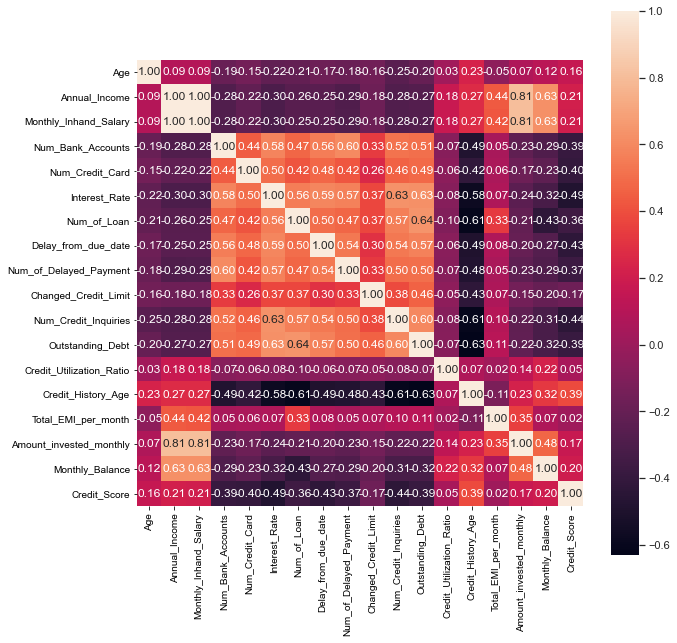

In [13]:
correlation = np.corrcoef(df_train.select_dtypes(include=['float64','int32']).values.T)
fig, ax = plt.subplots(figsize=(10,10))  
sns.set(font_scale=1)
hm = sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=corr.columns, xticklabels=corr.columns)

Credit score's have negative correlation relationship with lots of feature like number of bank accounts, interest rate, etc. The one with highest positive correlation relationship is credit history age at 0.39.

In [14]:
def plot_hist(data, name):
    plt.hist(data)
    plt.ylabel('Frequency')
    plt.xlabel(name)
    plt.title('Distribution of {}'.format(name))

In [15]:
#find all numeric columns
col_list=corr.columns.values.tolist()
col_list

['Age',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_Score']

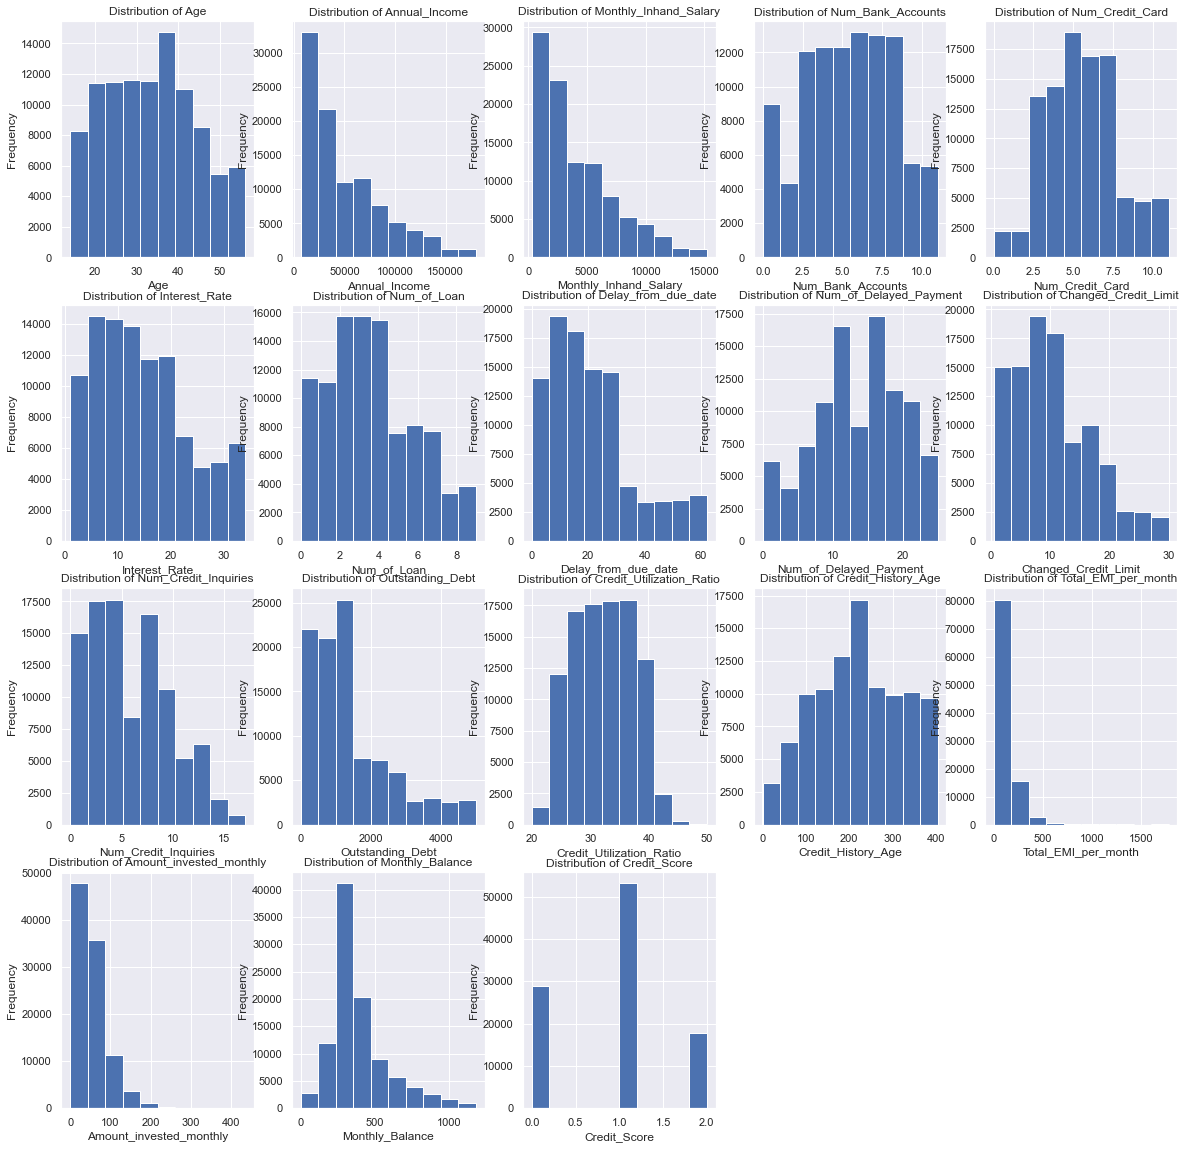

In [16]:
#plot frequency distributions for all numeric columns
fig = plt.figure(figsize=(20,20))

for i,col in enumerate(corr.columns):
    ax = fig.add_subplot(4,5,i+1)
    plot_hist(df_train[col],col)

Around half of the numerical features have rather normal distribution of their data.

In [17]:
#find all object columns
categorical_col_name= df_train.select_dtypes(include=['object']).columns
categorical_col_name=categorical_col_name.values.tolist()
categorical_col_name

['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

Categorical column names:  Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64


Categorical column names:  Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64


Categorical column names:  Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64


Categorical column names:  Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: Payment_Behaviour, dtype: int64




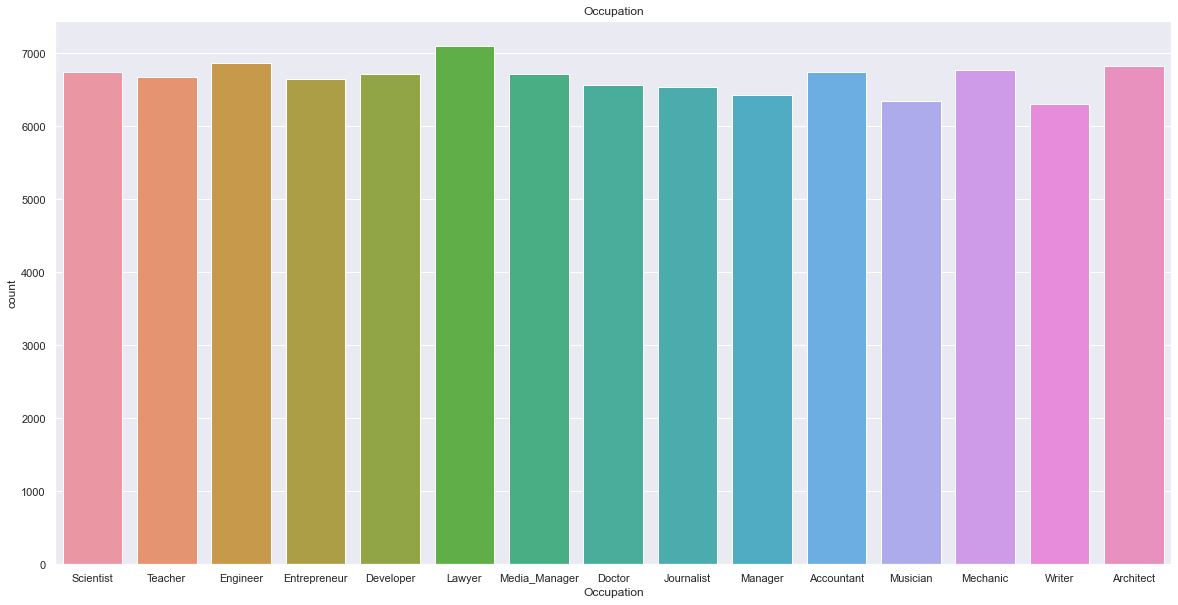

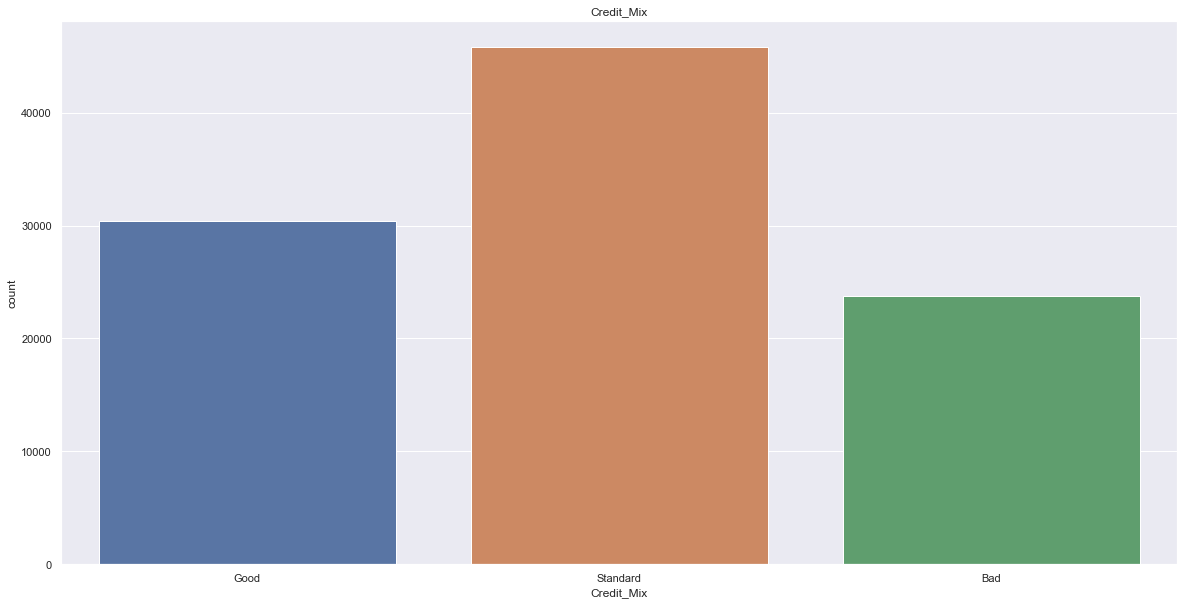

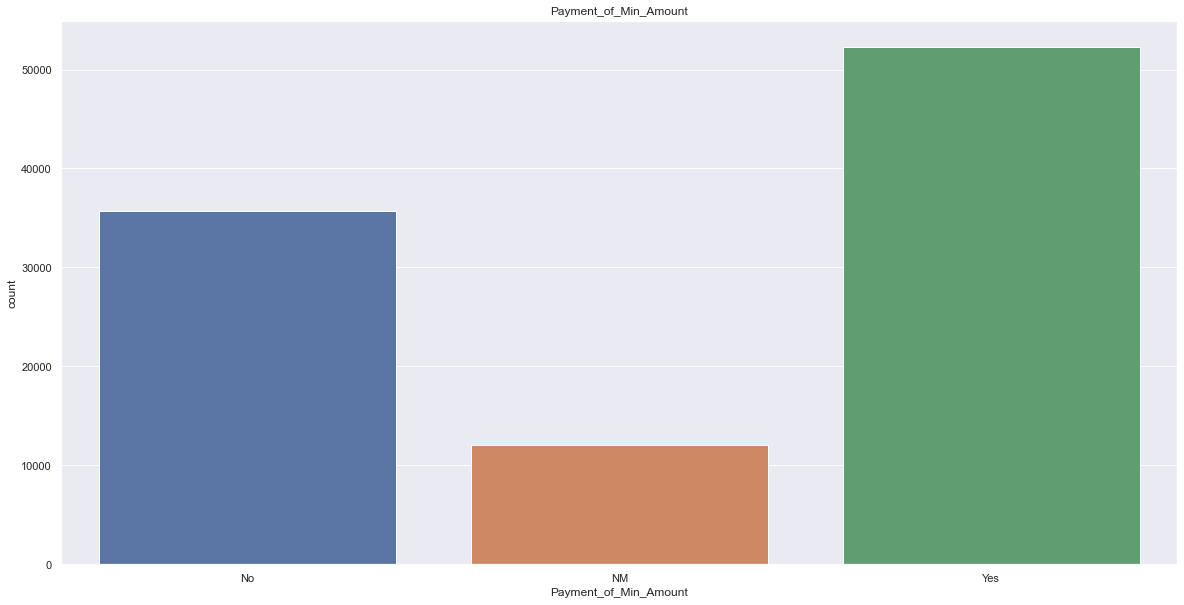

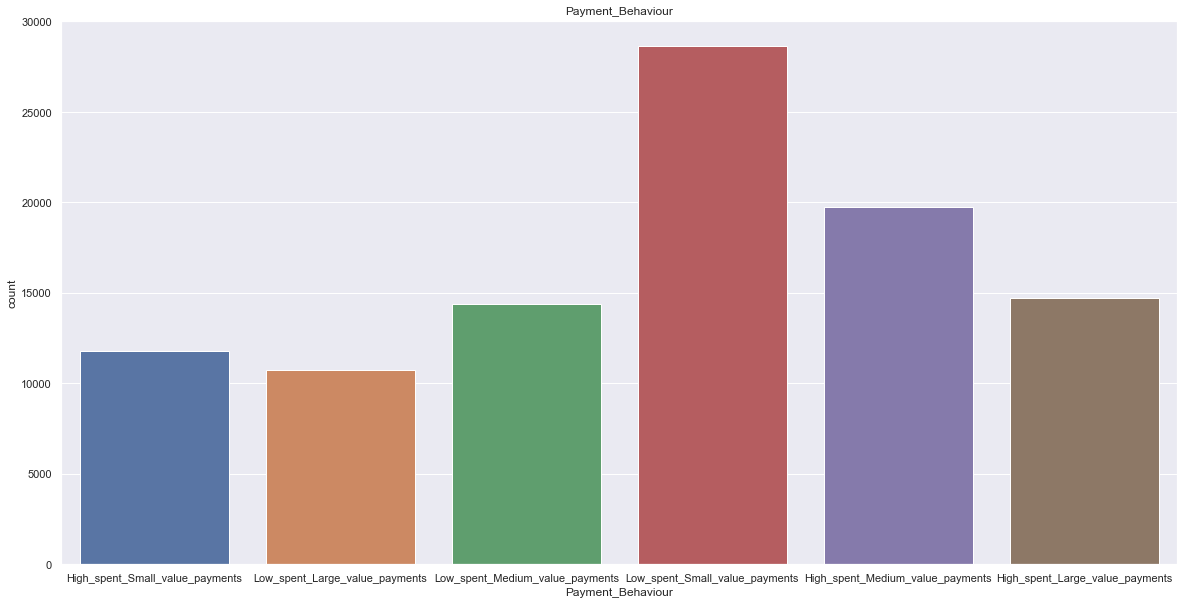

In [18]:
#plot count plot for all object columns
for col in categorical_col_name:
    print('Categorical column names: ', col)
    print(df_train[col].value_counts())
    plt.figure(figsize=(20, 10))
    sns.countplot(data=df_train,x=col).set(title=col)
    print('\n')

Except occupation, other object columns also have rather unequal distribution of data.

### 5. Handle dummy feature 

In [19]:
#convert categorical variables into dummy variables
categorical_col= df_train.select_dtypes(include=['object'])
dummy_features =  pd.get_dummies(categorical_col, drop_first=True)
df_train = pd.concat([df_train, dummy_features], axis=1)
df_train.drop(categorical_col,axis=1,inplace=True)
df_train

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,1,0,1,0,0,1,0,0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,0,1,0,1,0,0,0,1,0,0
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,1,0,1,0,0,0,0,1,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,0,1,0,1,0,0,0,0,0,1
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,0,1,0,1,0,0,0,0,0,0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,0,1,0,1,0,1,0,0,0,0
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,...,0,1,0,1,0,0,0,0,0,0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,0,1,0,1,0,0,0,1,0,0


In [20]:
#save the dataset
df_train.to_csv('Dataset/df_train_cleaned.csv', index=False)

### 6. Feature selection

In [21]:
#get feautre and target for the dataset
feature=df_train.drop('Credit_Score',axis=1)
target=df_train['Credit_Score']

In [22]:
#VarianceThreshold method
vt = VarianceThreshold(threshold=0.1)
vt.fit(feature)
pd.DataFrame({'Variance': vt.variances_, 'select_status': vt.get_support()}, index=feature.columns)

,Variance,select_status
Age,1.158800e+02,True
Annual_Income,1.466831e+09,True
Monthly_Inhand_Salary,1.015325e+07,True
Num_Bank_Accounts,6.725212e+00,True
Num_Credit_Card,4.272853e+00,True
Interest_Rate,7.641009e+01,True
Num_of_Loan,5.984599e+00,True
Delay_from_due_date,2.191728e+02,True
Num_of_Delayed_Payment,3.890186e+01,True
Changed_Credit_Limit,4.368480e+01,True


In [23]:
#dataset selected by VarianceThreshold method
df_variance=feature.iloc[:,vt.get_support()]
df_variance

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Amount_invested_monthly,Monthly_Balance,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,21.465380,312.494089,1,0,1,0,0,1,0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,21.465380,284.629162,1,0,1,0,0,0,0,0
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,21.465380,331.209863,1,0,1,0,0,0,1,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,21.465380,223.451310,1,0,1,0,0,0,0,1
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,21.465380,341.489231,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,24.028477,479.866228,1,0,1,0,0,0,0,0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,24.028477,496.651610,1,0,1,0,1,0,0,0
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,...,24.028477,516.809083,1,0,1,0,0,0,0,0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,24.028477,319.164979,1,0,1,0,0,0,0,0


In [24]:
#SelectKBest method
kbest = SelectKBest(score_func=f_classif, k=25) 
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
kbest.fit_transform(X_train, y_train)

array([[2.00000000e+01, 1.01399130e+05, 8.53592750e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.50000000e+01, 1.12882680e+05, 9.68489000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.90000000e+01, 2.81014600e+04, 2.17346381e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.80000000e+01, 6.68582700e+04, 5.77052250e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.50000000e+01, 1.94034050e+04, 1.90495042e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.30000000e+01, 1.91716800e+04, 1.41364000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [25]:
#dataset selected by SelectKBest method
df_selectKBest = feature.iloc[:,kbest.get_support()]
df_selectKBest

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Amount_invested_monthly,Monthly_Balance,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,21.465380,312.494089,0,1,0,1,0,0,1,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,...,21.465380,284.629162,0,1,0,1,0,0,0,0
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,21.465380,331.209863,0,1,0,1,0,0,0,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,21.465380,223.451310,0,1,0,1,0,0,0,1
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,...,21.465380,341.489231,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,...,24.028477,479.866228,0,1,0,1,0,0,0,0
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,...,24.028477,496.651610,0,1,0,1,0,1,0,0
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,...,24.028477,516.809083,0,1,0,1,0,0,0,0
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,...,24.028477,319.164979,0,1,0,1,0,0,0,0


### 7. Model training

In [26]:
#prepare the 2 datasets
datasets=[df_variance, df_selectKBest]
dataset_names=['Variance Selection Method', 'KBest Selection Method']

#prepare the machine learning algorithms
models=[LogisticRegression(max_iter=10000),KNeighborsClassifier(3),LinearSVC(max_iter=10000),
     DecisionTreeClassifier(max_depth=5),GaussianNB(),RandomForestClassifier(n_estimators=150),
     AdaBoostClassifier(n_estimators=100,learning_rate=0.1),XGBClassifier(use_label_encoder=False, eval_metric='error')]         
model_names=['Logistic Regression','KNN','Linear SVC','Decision Tree','Naive Bayes','Random forest','AdaBoost','XGBoost']

#prepare the scaling methods
scalers=[StandardScaler(), MinMaxScaler(), RobustScaler()]
scalers_names=['StandardScaler','MinMaxScaler', 'RobustScaler']

In [27]:
model_list=[]
scaler_list=[]
selection_list=[]
accuracy_scores=[]
balanced_accuracy_scores=[]
for k,data in enumerate(datasets):
    #Split data
    X_train, X_test, Y_train, Y_test=train_test_split(data, target, test_size=0.25, random_state=42)
    for i,model in enumerate(models):
        for j,scaler in enumerate(scalers):
            print(model_names[i]+" - "+scalers_names[j]+" - "+dataset_names[k])         
            #Make pipe
            pipe=Pipeline([('scaler',scaler),('classifier',model)])
            #Feed data to model and calculate accuracy score
            pipe.fit(X_train, Y_train)
            accuracy_score=pipe.score(X_test, Y_test)
            accuracy_scores.append(accuracy_score)
            print('Accuracy scores: ', accuracy_score)
            print('\n')
            model_list.append(model_names[i])
            scaler_list.append(scalers_names[j])
            selection_list.append(dataset_names[k])

Logistic Regression - StandardScaler - Variance Selection Method
Accuracy scores:  0.66052


Logistic Regression - MinMaxScaler - Variance Selection Method
Accuracy scores:  0.66044


Logistic Regression - RobustScaler - Variance Selection Method
Accuracy scores:  0.6604


KNN - StandardScaler - Variance Selection Method
Accuracy scores:  0.68292


KNN - MinMaxScaler - Variance Selection Method
Accuracy scores:  0.68872


KNN - RobustScaler - Variance Selection Method
Accuracy scores:  0.72888


Linear SVC - StandardScaler - Variance Selection Method
Accuracy scores:  0.65968


Linear SVC - MinMaxScaler - Variance Selection Method
Accuracy scores:  0.65976


Linear SVC - RobustScaler - Variance Selection Method
Accuracy scores:  0.65972


Decision Tree - StandardScaler - Variance Selection Method
Accuracy scores:  0.70608


Decision Tree - MinMaxScaler - Variance Selection Method
Accuracy scores:  0.70608


Decision Tree - RobustScaler - Variance Selection Method
Accuracy scores:  0.70

### 7. Results

In [32]:
#show training results, sort by accuracy scores
results=pd.DataFrame(zip(model_list, scaler_list, selection_list, accuracy_scores), columns=['Model','Scaler','Selection Method','Accuracy Score'])
results=results.sort_values(by=['Accuracy Score'], ascending=False)
results

,Model,Scaler,Selection Method,Accuracy Score
15,Random forest,StandardScaler,Variance Selection Method,0.81664
40,Random forest,MinMaxScaler,KBest Selection Method,0.81596
41,Random forest,RobustScaler,KBest Selection Method,0.81572
16,Random forest,MinMaxScaler,Variance Selection Method,0.81524
17,Random forest,RobustScaler,Variance Selection Method,0.81488
39,Random forest,StandardScaler,KBest Selection Method,0.81424
23,XGBoost,RobustScaler,Variance Selection Method,0.77252
22,XGBoost,MinMaxScaler,Variance Selection Method,0.77252
21,XGBoost,StandardScaler,Variance Selection Method,0.77252
46,XGBoost,MinMaxScaler,KBest Selection Method,0.77108


In [33]:
results.to_csv('Dataset/results.csv', index=False)

Based on the result above, Random forest with Robust Scaler and Variance Threshold selection method got the best result, with the accuracy at 0.81664. We will choose it for making prediction. XGBoost, KNN and Decision Tree also had rather good accuracy result at 0.7, meanwhile Adaboost, Naive Bayes and Linear SVC had the worse result in terms of accuracy.

In [34]:
#make the pipeline with best setting and make prediction 
pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(n_estimators=150))])
X_train, X_test, Y_train, Y_test=train_test_split(df_variance, target, test_size=0.25, random_state=42)
pipe.fit(X_train, Y_train)
Y_pred=pipe.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

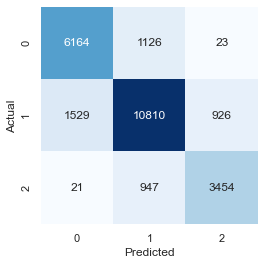

In [35]:
#confusion matrix
cm=confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, annot=True,annot_kws={"size": 12}, cbar=False,square=True, fmt="d", cmap="Blues")

In [36]:
#print classification report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      7313
           1       0.84      0.81      0.83     13265
           2       0.78      0.78      0.78      4422

    accuracy                           0.82     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.82      0.82      0.82     25000



Percentage of recall (true positive/(true positive + false negative)) for the 3 credit score class: Poor: 0.84, Standard: 0.81, Good:0.78

Percentage of precision (true positive/(true positive + false positive)) for the 3 credit score class: Poor: 0.8, Standard: 0.84, Good:0.78


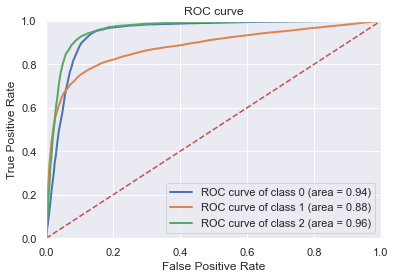

In [37]:
#ROC curve
y_test_binarize = label_binarize(Y_test, classes=[0, 1, 2])
n_classes = y_test_binarize.shape[1]
y_score = pipe.fit(X_train, Y_train).predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
plt.figure()
lw = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i],tpr[i],lw=lw,label="ROC curve of class {} (area = {:.2f})".format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### 8. Out of sample prediction

In [38]:
#get out of sample data from tesing dataset, only 1% of data is used for saving time
df_test=pd.read_csv('Dataset/test.csv')
out_of_sample=df_test.sample(frac=0.01, random_state=42)

In [39]:
#drop unnecessary columns
out_of_sample_df=out_of_sample.drop(['ID','Customer_ID','Month','Name','SSN','Type_of_Loan'],axis=1)

In [40]:
#convert categorical variables into dummy features
categorical_col= out_of_sample_df.select_dtypes(include=['object'])
dummy_features =  pd.get_dummies(categorical_col, drop_first=True)
out_of_sample_df = pd.concat([out_of_sample_df, dummy_features], axis=1)
out_of_sample_df.drop(categorical_col,axis=1,inplace=True)
out_of_sample_df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Writer,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
33553,27.0,39453.740,3254.811667,5.0,1.0,6.0,1.0,4.0,2.0,0.80,...,1,1,0,1,0,0,1,0,0,0
9427,32.0,18495.140,1839.261667,3.0,3.0,7.0,4.0,5.0,14.0,7.61,...,0,0,1,0,1,1,0,0,0,0
199,39.0,95956.500,8279.375000,8.0,4.0,11.0,2.0,23.0,10.0,7.94,...,0,0,1,1,0,0,0,0,1,0
12447,27.0,15391.470,1054.379292,7.0,7.0,19.0,3.0,20.0,12.0,13.68,...,0,0,1,0,1,0,0,0,0,0
39489,45.0,87966.960,7564.580000,5.0,2.0,15.0,1.0,6.0,18.0,10.24,...,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,35.0,17001.340,1214.778333,6.0,5.0,5.0,1.0,10.0,20.0,5.62,...,0,0,1,1,0,0,0,0,0,1
11449,29.0,24308.050,1762.670833,7.0,6.0,11.0,2.0,24.0,10.0,13.49,...,0,0,1,0,1,0,0,0,1,0
30745,53.0,18995.115,1399.926250,5.0,3.0,6.0,3.0,7.0,0.0,7.86,...,0,1,0,1,0,0,0,0,1,0
29702,51.0,36850.650,3266.887500,6.0,3.0,19.0,3.0,13.0,16.0,10.77,...,0,0,1,0,1,0,0,0,0,1


In [41]:
#select only the columns chosen for the best model
out_of_sample_df=pd.DataFrame(out_of_sample_df, columns=df_variance.columns)

In [42]:
#make predictions to the out of sample data
out_of_sample_pred=pipe.predict(out_of_sample_df)

In [43]:
#attach the predictions to the out of sample data
out_of_sample['Prediction']=out_of_sample_pred

In [44]:
#change the prediction from numeric value to corresponding text 
out_of_sample['Prediction']=np.where(out_of_sample['Prediction']==0,'Poor',np.where(out_of_sample['Prediction']==1,'Standard','Good'))

In [45]:
#show the result of out of sample data
out_of_sample

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Prediction
33553,106299,29036,10,Rodrigo Camposj,27.0,612660281.0,Writer,39453.740,3254.811667,5.0,...,Good,1432.03,29.507018,355.0,No,26.008763,61.575387,High_spent_Small_value_payments,387.230462,Good
9427,33917,14429,12,Malones,32.0,647387901.0,Teacher,18495.140,1839.261667,3.0,...,Standard,1216.59,35.104567,172.0,Yes,39.645585,30.486040,High_spent_Medium_value_payments,363.794541,Standard
199,6233,8867,12,Nate Raymondj,39.0,477905881.0,Doctor,95956.500,8279.375000,8.0,...,Standard,1079.73,28.917825,390.0,No,95.521629,202.571701,Low_spent_Medium_value_payments,574.925833,Standard
12447,42977,26888,12,Ilona Wissenbache,27.0,979884689.0,Accountant,15391.470,1054.379292,7.0,...,Standard,939.63,35.076711,249.0,Yes,114.758661,14.269745,High_spent_Large_value_payments,318.977051,Standard
39489,124107,23453,10,Saqib Iqbalp,45.0,192169048.0,Mechanic,87966.960,7564.580000,5.0,...,Standard,166.72,39.011025,238.0,Yes,64.350195,51.166459,High_spent_Medium_value_payments,807.677815,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,6580,41598,11,Papadimaso,35.0,898940497.0,Architect,17001.340,1214.778333,6.0,...,Standard,1093.87,30.609386,216.0,No,10.535556,41.289065,Low_spent_Small_value_payments,338.322270,Standard
11449,39987,47501,10,Adlerk,29.0,134034386.0,Journalist,24308.050,1762.670833,7.0,...,Standard,174.32,27.275389,167.0,Yes,21.124017,22.875730,Low_spent_Medium_value_payments,379.075580,Standard
30745,97875,50126,10,a Maxwella,53.0,767683847.0,Media_Manager,18995.115,1399.926250,5.0,...,Good,1077.49,28.440964,336.0,No,44.179385,57.178680,Low_spent_Medium_value_payments,312.966656,Good
29702,94744,31523,11,Melissa Akinu,51.0,534071682.0,Accountant,36850.650,3266.887500,6.0,...,Standard,420.06,35.465833,317.0,Yes,52.517522,31.864861,Low_spent_Small_value_payments,363.451313,Standard


In [46]:
#save the prediction to excel
out_of_sample.to_csv('Dataset/out_of_sample_predictions.csv', index=False)

In [50]:
#we can also check the predicted probability in each predictions
pred_prob=pipe.predict_proba(out_of_sample_df.iloc[:10,:])

In [76]:
#function to display class label
def display_classLabel(Y_pred):
    label=''
    if Y_pred==0:
        label='Poor'
    elif Y_pred==1:
        label='Standard'
    else:
        label='Good'
    print('Predicted class of credit score for customer', i+1, 'is', Y_pred,', which means',label)

#function to display predicted probability
def display_PredProb(Y_pred, pred_prob):
    prob_label=''
    prob=0
    if Y_pred==0:
        prob_label=' , which means the probability of having Poor credit score is'
        prob=pred_prob[0]
    elif Y_pred==1:
        prob_label=', which means probability of having Standard credit score is'
        prob=pred_prob[1]
    else:
        prob_label=', which means probability of having Good credit score is'
        prob=pred_prob[2]

    print('Predicted probability of customer', i+1, 'is', prob, prob_label, prob)
    

In [79]:
#display the predicted probability of the first 10 predictions
for i in range(pred_prob.shape[0]):
    display_classLabel(out_of_sample_pred[i])
    print('')
    display_PredProb(out_of_sample_pred[i], pred_prob[i])
    print('')

Predicted class of credit score for customer 1 is 2 , which means Good

Predicted probability of customer 1 is 0.6133333333333333 , which means, probability of having Good credit score is 0.6133333333333333

Predicted class of credit score for customer 2 is 1 , which means Standard

Predicted probability of customer 2 is 0.5666666666666667 , which means, probability of having Standard credit score is 0.5666666666666667

Predicted class of credit score for customer 3 is 1 , which means Standard

Predicted probability of customer 3 is 0.7266666666666667 , which means, probability of having Standard credit score is 0.7266666666666667

Predicted class of credit score for customer 4 is 1 , which means Standard

Predicted probability of customer 4 is 0.8266666666666667 , which means, probability of having Standard credit score is 0.8266666666666667

Predicted class of credit score for customer 5 is 1 , which means Standard

Predicted probability of customer 5 is 0.96 , which means, probabili